In [5]:
import pandas as pd
import tqdm
from tqdm import tqdm, tqdm_notebook 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's first understand the features. We created a file called AZDIAS_Feature_Summary.csv where we have the column and the possible values

In [6]:
feat_df = pd.read_csv('./data/AZDIAS_Feature_Summary.csv')

In [7]:
feat_df[['Attribute']] = feat_df[['Attribute']].fillna(method='ffill')

In [8]:
feat_df.sample(10)

,Attribute,Value
1696,KBA13_PEUGEOT,4
747,HEALTH_TYP,2
167,D19_BANKEN_DIREKT_RZ,5
1316,KBA13_CCM_3001,0
2019,PLZ8_ANTG1,2
1107,KBA05_VORB2,0
1039,KBA05_MOTRAD,2
1182,KBA13_BJ_1999,-1
659,FINANZTYP,5
347,D19_GESAMT_ONLINE_DATUM,9


#### FUNCTIONS

In [9]:
def add_num_checker(df):
    """
    Input is a dataframe with attributes and their values
    Output in the same dataframe with an added column that check if the value is numerical (1-yes, 0-no)
    """
    
    is_num = []

    for val in df['Value']:
        try:
            val = int(val)
            is_num.append(1)
        except:
            is_num.append(0)
            continue

    df['Is_Numerical'] = is_num
    
    return df

In [10]:
def categorical_feat_cleaner(df):
    """
    Input dataframe with attributes and their values and is_numerical value
    Outputs the same dataframe with the updated dataframe and a set of categorical value types
    """
    df['Value'] = [ 99 if (row['Value'] == '-1, 9') or (row['Value'] == '-1, 0') else row['Value'] for index,row in df.iterrows()]
    df['Value'] = [ 99 if (row['Value'] == -1) else row['Value'] for index,row in df.iterrows()]
    feat_df['Value'] = [ 99 if (row['Value'] == '-1') else row['Value'] for index,row in feat_df.iterrows()]
    feat_df['Value'] = [ 1 if (row['Value'] == '…') else row['Value'] for index,row in feat_df.iterrows()]
    
    df = add_num_checker(df)
    non_num = df[df['Is_Numerical'] == 0]
    set_values = list(set(non_num['Value']))
    
    return df, set_values

In [11]:
def conflict_checker(df):
    """
    Input dataframe with attributes and their values and is_numerical value
    Outputs list of attributes with conflicts
    """
    attr_2fix = []
    
    df = add_num_checker(df)
    
    for attr in tqdm_notebook(list(set(df['Attribute']))):
        len_attr = 0
        add_num = 0

        try:
            temp_df = df[df['Attribute'] == attr]
            len_attr = len(temp_df['Attribute'])
            add_num = sum(temp_df['Is_Numerical'])

            if add_num == 0:
                add_num = len(temp_df['Is_Numerical'])

            if len_attr != add_num:
                attr_2fix.append(attr)
        except:
            attr_2fix.append(attr)
            continue
    
    return attr_2fix

In [12]:
def datatype_lookup_table(df):
    """
    Input dataframe with attributes and their values and is_numerical value
    Outputs a dataframe with datatype column addition
    """
    
    attr_list = []
    datatype_list = []


    for attr in tqdm_notebook(list(set(df['Attribute']))):
        temp_df = df[df['Attribute'] == attr]

        is_num_set = list(set(temp_df['Is_Numerical']))
        type_checker = len(is_num_set)

        if type_checker == 1:
            attr_list.append(attr)
            if int(is_num_set[0]):
                datatype_list.append('numerical')
            else:
                datatype_list.append('categorical')
        else:
            attr_list.append(attr)
            datatype_list.append('conflict')

    type_lookup = pd.DataFrame()
    type_lookup['attr'] = attr_list
    type_lookup['datatype'] = datatype_list
    
    return type_lookup

-------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
feat_df = add_num_checker(feat_df)
feat_df.sample(10)

,Attribute,Value,Is_Numerical
289,D19_FREIZEIT_RZ,0,1
1991,MOBI_REGIO,5,1
1524,KBA13_KMH_251,5,1
2123,SEMIO_KRIT,1,1
2063,PRAEGENDE_JUGENDJAHRE,9,1
441,D19_REISEN_RZ,3,1
2066,PRAEGENDE_JUGENDJAHRE,12,1
1664,KBA13_MERCEDES,-1,1
2187,SEMIO_TRADV,1,1
722,GFK_URLAUBERTYP,11,1


No we want to find conflicting Attributes

In [14]:
non_num = feat_df[feat_df['Is_Numerical'] == 0]
non_num.head()

,Attribute,Value,Is_Numerical
5,ALTERSKATEGORIE_GROB,"-1, 0",0
33,ANREDE_KZ,"-1, 0",0
36,ANZ_HAUSHALTE_AKTIV,…,0
37,ANZ_HH_TITEL,…,0
38,ANZ_PERSONEN,…,0


In [15]:
non_num['Value'].value_counts()

-1, 9    75
-1, 0    16
…         7
O         1
1E        1
3D        1
6D        1
7D        1
1A        1
4D        1
4A        1
5F        1
3A        1
8A        1
W         1
9B        1
9E        1
1C        1
6F        1
5E        1
9D        1
3C        1
6A        1
5D        1
3B        1
5B        1
1B        1
4B        1
2B        1
7E        1
5C        1
7B        1
2D        1
4C        1
8D        1
2A        1
7A        1
9C        1
8B        1
7C        1
1D        1
9A        1
2C        1
6C        1
8C        1
4E        1
6B        1
5A        1
6E        1
Name: Value, dtype: int64

There are 4 types of values '...','-1', '-1, 0','-1, 9' for unknown that must be changed to a numerical value

In [16]:
feat_df, cat_values = categorical_feat_cleaner(feat_df)

In [17]:
feat_df.head()

,Attribute,Value,Is_Numerical
0,AGER_TYP,99,1
1,AGER_TYP,0,1
2,AGER_TYP,1,1
3,AGER_TYP,2,1
4,AGER_TYP,3,1


In [18]:
cat_values

['3C',
 '7B',
 '1C',
 'W',
 '5F',
 '4D',
 '6C',
 '7D',
 '7C',
 '3D',
 '1A',
 '4B',
 '6E',
 '9C',
 '2C',
 '6F',
 '9E',
 '2A',
 '4C',
 '5C',
 '7A',
 '6D',
 '3B',
 '5D',
 '6A',
 '9D',
 '5E',
 '8A',
 '3A',
 '5B',
 '4A',
 '2B',
 '1B',
 '8C',
 '5A',
 '6B',
 '4E',
 '8B',
 '9A',
 'O',
 '8D',
 '1E',
 '1D',
 '9B',
 '2D',
 '7E']

In [19]:
attr_2fix = conflict_checker(feat_df)
attr_2fix

['OST_WEST_KZ']

In [20]:
feat_df[feat_df['Attribute'] == 'OST_WEST_KZ']

,Attribute,Value,Is_Numerical
2013,OST_WEST_KZ,99,1
2014,OST_WEST_KZ,O,0
2015,OST_WEST_KZ,W,0


The last attribute to fix is 'OST_WEST_KZ' Its values are either 'unknown' 'O' (East) or 'W' (West)

In [21]:
feat_df['Value'] = [ 'Unknown' if ((row['Value'] != 'O') and (row['Value'] != 'W') and (row['Attribute'] == 'OST_WEST_KZ'))  else row['Value'] for index,row in feat_df.iterrows()]

In [22]:
feat_df[feat_df['Attribute'] == 'OST_WEST_KZ']

,Attribute,Value,Is_Numerical
2013,OST_WEST_KZ,Unknown,1
2014,OST_WEST_KZ,O,0
2015,OST_WEST_KZ,W,0


In [23]:
attr_2fix = conflict_checker(feat_df)
attr_2fix

[]

No more errors! 'OST_WEST_KZ' was fixed!

Lets create a datatype lookup table

In [24]:
type_lookup = datatype_lookup_table(feat_df)

In [25]:
type_lookup[type_lookup['attr'] == 'OST_WEST_KZ']

,attr,datatype
84,OST_WEST_KZ,categorical


In [26]:
type_lookup['datatype'].value_counts()

numerical      436
categorical     45
Name: datatype, dtype: int64

We have sucessfully identified the type of attribute(numerical vs. categorical) and the types of values each attribute can have. Now, we are equiped to clean the raw data. Let's export the feat_df as clean_features.csv and the the type_lookup as type_lookup.csv. This will help us during the cleaning process.

In [27]:
feat_df.to_csv('./data/clean_features.csv',index=False)
type_lookup.to_csv('./data/type_lookup.csv',index=False)

### Data Exploration

In [ ]:
#General population dataset
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';', low_memory=False)
azdias.head()

In [ ]:
#Does the features match the feature set?
features = list(type_lookup['attr'])
azdias_feat = list(azdias.columns)
len(features),len(azdias_feat)

In [ ]:
cols = [ col for col in azdias_feat if col in features]
cols = ['LNR'] + cols
len(cols)

In [ ]:
#Remove the columns from azdias that are not part of the attributes. However we keep the LNR identification code
azdias_subset = azdias[cols]
azdias_subset.head()

In [ ]:
azdias_subset.shape

In [ ]:
#figure out the nan per column
nans = azdias_subset.isna().sum().sort_values()

In [ ]:
nans_df = pd.DataFrame()
nans_df['attr'] = list(nans.index)
nans_df['nan_count'] = list(nans.values)

In [ ]:
len_df = azdias_subset.shape[0]
nans_df['pct_nan'] = [float(count)/len_df for count in nans_df['nan_count']]
nans_df.head()

In [ ]:
nans_df['pct_nan'].hist()

In [ ]:
nans_df = pd.merge(nans_df,type_lookup, on=['attr'])
nans_df.head()

In [35]:
nans_df['datatype'].value_counts()

numerical      270
categorical      2
Name: datatype, dtype: int64

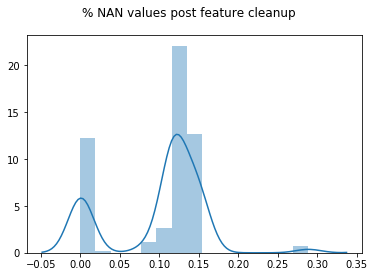

In [39]:
import seaborn as sns
nums = nans_df[nans_df['datatype']=='numerical']['pct_nan']
sns.distplot([nums])
plt.suptitle('% NAN values post feature cleanup');
plt.savefig('assets/NAN_values_feat_cleanup.png')

In [40]:
nans_df[nans_df['datatype']=='categorical']

,attr,nan_count,pct_nan,datatype
74,OST_WEST_KZ,67105,0.105114,categorical
85,CAMEO_DEU_2015,71216,0.111554,categorical


Most of the numerical and categorical values are are under 15% NAN. We now need to check how many of them are not within the attributes given values

In [41]:
out_feat = pd.DataFrame()
attr_list = []
unknown_count = []
num_col = [ col for col in cols if col not in cat_col]

for col in tqdm(num_col):
    
    possible_values = feat_df[feat_df['Attribute'] == col]['Value']
    azdias_subset[col] = [value if value in possible_values else 99 for value in azdias_subset[col]]
    count = 0
    attr_list.append(col)


NameError: name 'cat_col' is not defined

In [42]:
out_feat = pd.DataFrame()
attr_list = []
unknown_count = []

out_feat['attr'] = list(azdias_subset.columns)

for attr in out_feat['attr']:
    try:
        attr_list.append(attr)
        unknown_count.append(azdias_subset[attr].count(99))
    except:
        attr_list.append(attr)
        unknown_count.append(0)
        continue

out_feat['unknown_count'] = unknown_count

In [43]:
#Lets check the two categorical variables
cat_col = ['OST_WEST_KZ','CAMEO_DEU_2015']

for col in tqdm(cat_col):
    
    possible_values = feat_df[feat_df['Attribute'] == col]['Value']
    azdias_subset[col] = [value if value in possible_values else 'Unknown' for value in azdias_subset[col]]
    count = 0
    attr_list.append(col)

for attr in cat_col:
    try:
        attr_list.append(attr)
        unknown_count.append(azdias_subset[attr].count(99))
    except:
        attr_list.append(attr)
        unknown_count.append(0)
        continue

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.21it/s]


In [44]:
out_feat['unknown_count'].value_counts()

0    273
Name: unknown_count, dtype: int64

The are the no attribute values that are outside of the attribute value set! Lets export a clean_azdias_subset.csv

In [45]:
azdias_subset.to_csv('./data/clean_azdias_subset.csv',index=False)

In [3]:
azdias_subset = pd.read_csv('./data/clean_azdias_subset.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
azdias_subset.head()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,0.0,11.0,0.0,2.0,0.0,6.0,Unknown,8,...,1.0,3.0,0.0,2.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,17.0,10.0,0.0,1.0,0.0,2.0,Unknown,4,...,4.0,2.0,0.0,1.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,13.0,1.0,0.0,0.0,0.0,4.0,Unknown,2,...,4.0,1.0,0.0,1.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,20.0,3.0,0.0,4.0,0.0,2.0,Unknown,6,...,7.0,2.0,0.0,2.0,2.0,9.0,3.0,4.0,1.0,3.0
